# Predicting credit card customer churn - Modeling

In [1]:
# import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warning messages to ensure clean outputs
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/BankChurners_preprocessed.csv')

# increase limit to show all columns in dataframe
pd.set_option('display.max_columns', 500)
df.head()

,Customer_ID,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Attrition_Flag_Attrited Customer
0,768805383,0.404255,0.6,0.604651,0.8,0.166667,0.500000,0.340190,0.308701,0.345116,0.392994,0.035273,0.248062,0.437534,0.061,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,818770008,0.489362,1.0,0.720930,1.0,0.166667,0.333333,0.206112,0.343266,0.214093,0.453636,0.043452,0.178295,1.000000,0.105,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,713982108,0.531915,0.6,0.534884,0.6,0.166667,0.000000,0.059850,0.000000,0.098948,0.763615,0.076611,0.077519,0.628164,0.000,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,769911858,0.297872,0.8,0.488372,0.4,0.666667,0.166667,0.056676,1.000000,0.022977,0.413600,0.036775,0.077519,0.628164,0.760,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,709106358,0.297872,0.6,0.186047,0.8,0.166667,0.000000,0.099091,0.000000,0.136557,0.640271,0.017025,0.139535,0.673129,0.000,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0


In [4]:
df.columns

Index(['Customer_ID', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver',
       'Attrition_Flag_Attrited Customer'],
      dtype='object')

Ignoring the customer ID and the attritted flag columns, we have 32 feature columns. As the values have been scaled previously in [the preprocessing step](https://github.com/elpea74/CapstoneTwo/blob/main/Capstone%202%20-%20Preprocessing.ipynb), their values now all range from 0 to 1. We will now create a new dataset only containing feature columns.

In [7]:
feature_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver']
df_feature = df[feature_cols]
df_feature.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.404255,0.6,0.604651,0.8,0.166667,0.500000,0.340190,0.308701,0.345116,0.392994,0.035273,0.248062,0.437534,0.061,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,0.489362,1.0,0.720930,1.0,0.166667,0.333333,0.206112,0.343266,0.214093,0.453636,0.043452,0.178295,1.000000,0.105,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,0.531915,0.6,0.534884,0.6,0.166667,0.000000,0.059850,0.000000,0.098948,0.763615,0.076611,0.077519,0.628164,0.000,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0.297872,0.8,0.488372,0.4,0.666667,0.166667,0.056676,1.000000,0.022977,0.413600,0.036775,0.077519,0.628164,0.760,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0.297872,0.6,0.186047,0.8,0.166667,0.000000,0.099091,0.000000,0.136557,0.640271,0.017025,0.139535,0.673129,0.000,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0


In [8]:
X = df_feature
y = df['Attrition_Flag_Attrited Customer']

SMOTE was also determined previously to help increase the recall score of a Random Forest model. Therefore, we'll use SMOTE to oversample the minority class (i.e. Attritted customers)

In [9]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (10120, 32)
Shape of X after SMOTE: (16988, 32)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: Attrition_Flag_Attrited Customer, dtype: float64

## Applying machine learning models

As this is a classification problem aiming to predict which customers churn their credit cards, we will use the following ML models:

- Logistic Regression
- K-Nearest Neighbor (KNN)
- Support vector machine (SVM)
- Random Forest
- Gradient Boost

We will split the dataset into a training and a testing set.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

In [15]:
# importing all models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

### Logistic Regression

In [16]:
C_param_range = [0.001,0.01,0.1,1,10,100]

table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
table['C_parameter'] = C_param_range


j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    logreg = LogisticRegression(penalty = 'l2', C = i,random_state = 40)
    logreg.fit(X_train,y_train)
    
    # Predict using model
    y_pred_lr = logreg.predict(X_test)
    
    # Saving accuracy score in table
    table.iloc[j,1] = accuracy_score(y_test,y_pred_lr)
    j += 1
    
table

,C_parameter,Accuracy
0,0.001,0.778196
1,0.010,0.820815
2,0.100,0.861314
3,1.000,0.874735
4,10.000,0.87709
5,100.000,0.87709


Accuracy = 0.8771
Recall = 0.8836



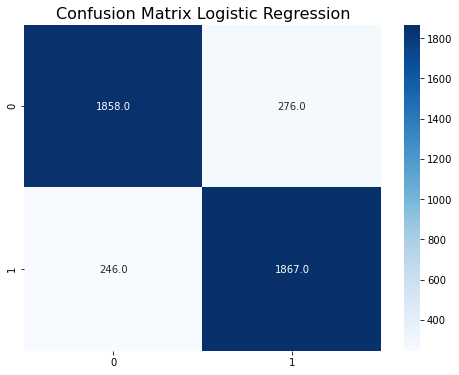

In [18]:
# Evaluate
print(f'Accuracy = {accuracy_score(y_test, y_pred_lr):.4f}\nRecall = {recall_score(y_test, y_pred_lr):.4f}\n')
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix Logistic Regression', size=16)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.1f');

In [20]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(logreg,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(logreg,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_test_lr= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_lr))

[0.94132465 0.95470073 0.93871186 0.94772301 0.94883847]
Mean cross validation test score: 0.9462597448479695
Mean cross validation train score: 0.9419856900765821
Standard deviation in cv test scores: 0.005680965609709721


### K-Nearest Neighbors

Accuracy = 0.8380
Recall = 0.9650



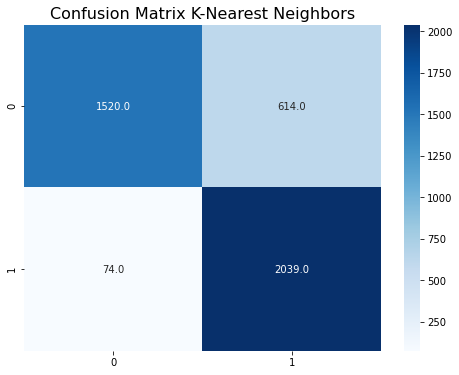

In [24]:
knn = KNeighborsClassifier(n_neighbors=10, weights='distance')

# Fit model to training data
knn.fit(X_train, y_train)

# Predict using model: 
y_pred_knn = knn.predict(X_test)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test, y_pred_knn):.4f}\nRecall = {recall_score(y_test, y_pred_knn):.4f}\n')
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix K-Nearest Neighbors', size=16)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.1f');

In [25]:
cv_scores_test= cross_val_score(knn,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(knn,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_knn_test= cv_scores_test.mean()
cv_scores_knn_train= cv_scores_train.mean()
cv_scores_std_test_knn= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_knn_test))
print ('Mean cross validation train score: ' +str(cv_scores_knn_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_knn))

[0.86541155 0.89591465 0.8847379  0.84735896 0.88033175]
Mean cross validation test score: 0.8747509625847545
Mean cross validation train score: 0.9423369952427729
Standard deviation in cv test scores: 0.016830521815197466


### Support vector machine

Accuracy = 0.9206
Recall = 0.9356



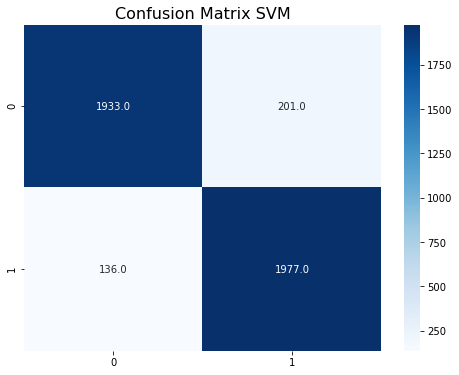

In [26]:
svm = SVC()

# Fit model to training data
svm.fit(X_train, y_train)

# Predict using model: 
y_pred_svm = svm.predict(X_test)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test, y_pred_svm):.4f}\nRecall = {recall_score(y_test, y_pred_svm):.4f}\n')
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix SVM', size=16)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.1f');


In [27]:
cv_scores_test= cross_val_score(svm,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(svm,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_svm_test= cv_scores_test.mean()
cv_scores_svm_train= cv_scores_train.mean()
cv_scores_std_test_svm= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_svm_test))
print ('Mean cross validation train score: ' +str(cv_scores_svm_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_svm))

[0.95202662 0.963703   0.94197494 0.95402733 0.95807852]
Mean cross validation test score: 0.9539620803709135
Mean cross validation train score: 0.96597887890835
Standard deviation in cv test scores: 0.007201005931607423


### Random Forest

Accuracy = 0.9762
Recall = 0.9782



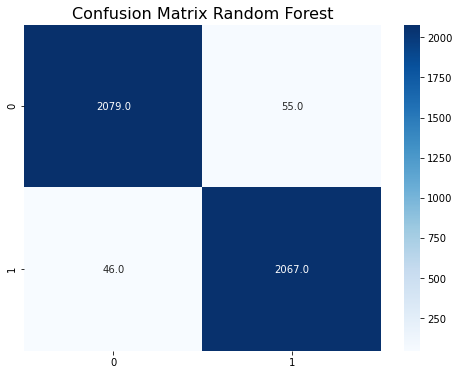

In [28]:
rf = RandomForestClassifier()

# Fit model to training data
rf.fit(X_train, y_train)

# Predict using model: 
y_pred_rf = rf.predict(X_test)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test, y_pred_rf):.4f}\nRecall = {recall_score(y_test, y_pred_rf):.4f}\n')
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix Random Forest', size=16)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.1f');


In [29]:
cv_scores_test= cross_val_score(rf,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(rf,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_test_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_rf))

[0.99166487 0.9948594  0.99031898 0.99498041 0.99420069]
Mean cross validation test score: 0.9932048712622906
Mean cross validation train score: 0.9962965615213892
Standard deviation in cv test scores: 0.0018751874459979176


### Gradient Boost

Accuracy = 0.9772
Recall = 0.9778



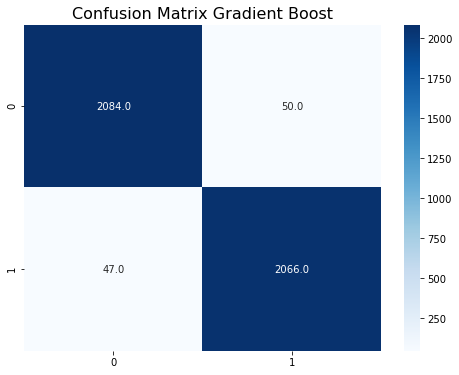

In [30]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=42)

# Fit model to training data
gb.fit(X_train, y_train)

# Predict using model: 
y_pred_gb = gb.predict(X_test)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test, y_pred_gb):.4f}\nRecall = {recall_score(y_test, y_pred_gb):.4f}\n')
cm = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix Gradient Boost', size=16)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.1f');

In [31]:
cv_scores_test= cross_val_score(gb,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(gb,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_gb_test= cv_scores_test.mean()
cv_scores_gb_train= cv_scores_train.mean()
cv_scores_std_test_gb= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_gb_test))
print ('Mean cross validation train score: ' +str(cv_scores_gb_test))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_gb))

[0.99579783 0.99719302 0.99114863 0.99719192 0.99470016]
Mean cross validation test score: 0.9952063091038547
Mean cross validation train score: 0.9952063091038547
Standard deviation in cv test scores: 0.0022343020234904354


## Model comparison

We applied different ML models and evaluate them using ROC-AUC scores. We will now compare the cross validation test score of all models to see which one is the most accurate.

In [79]:
cv_scores_test = pd.to_numeric([cv_scores_lr_test,cv_scores_knn_test,cv_scores_svm_test,cv_scores_rf_test,cv_scores_gb_test], downcast='float')
cv_scores_train = pd.to_numeric([cv_scores_lr_train,cv_scores_knn_train,cv_scores_svm_train,cv_scores_rf_train,cv_scores_gb_train], downcast='float')
accuracy_scores = pd.to_numeric([accuracy_score(y_test, y_pred_lr),accuracy_score(y_test, y_pred_knn),accuracy_score(y_test, y_pred_svm),accuracy_score(y_test, y_pred_rf),accuracy_score(y_test, y_pred_gb)], downcast='float')
cols = ['Model', 'CV test score', 'CV train score', 'Accuracy']
indexes = ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine', 'Random Forest', 'Gradient Boost']

df_scores = pd.DataFrame(np.array([indexes, cv_scores_test, cv_scores_train, accuracy_scores])).T

df_scores.columns = cols
#df_scores.set_index('Model', inplace=True)

df_scores

,Model,CV test score,CV train score,Accuracy
0,Logistic Regression,0.94625974,0.94198567,0.87708974
1,K-Nearest Neighbors,0.874751,0.942337,0.8380033
2,Support Vector Machine,0.9539621,0.96597886,0.9206499
3,Random Forest,0.9932049,0.9962966,0.9762185
4,Gradient Boost,0.9952063,0.99669766,0.97716033


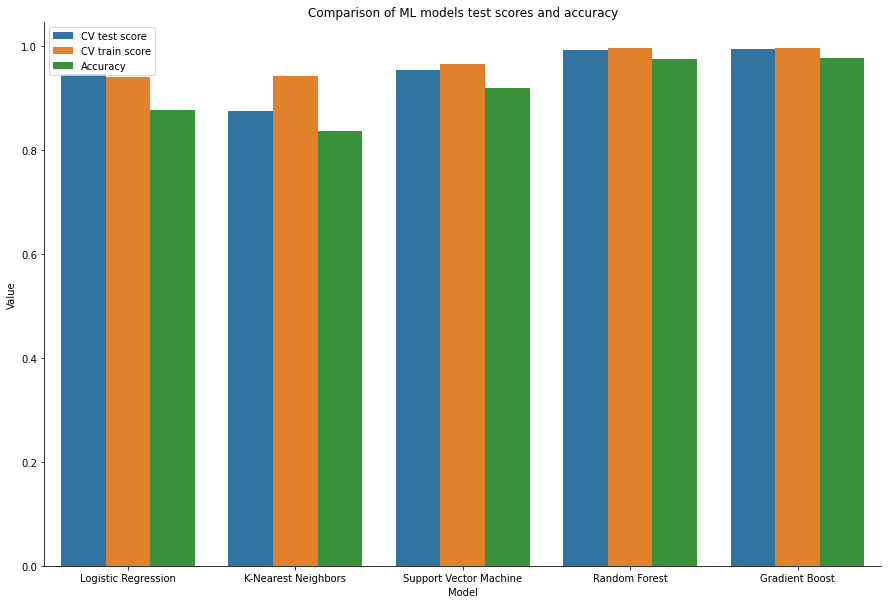

In [91]:
df_scores.explode('CV test score')
df_scores['CV test score'] = df_scores['CV test score'].astype('float')

df_scores.explode('CV train score')
df_scores['CV train score'] = df_scores['CV train score'].astype('float')

df_scores.explode('Accuracy')
df_scores['Accuracy'] = df_scores['Accuracy'].astype('float')

fig, ax1 = plt.subplots(figsize=(15, 10))
tidy = df_scores.melt(id_vars='Model').rename(columns=str.title)
tidy
sns.barplot(x='Model', y='Value', hue='Variable', data=tidy, ax=ax1)
plt.title('Comparison of ML models test scores and accuracy')
plt.xlabel('Model')
plt.legend(loc='best')
sns.despine(fig)

From the barplot, we can see that Random Forest and Gradient Boost are the best models to use for our credit card churn predictions.